## Sentiment, Location and Gender Analysis

## Import Tweet Data

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#to plot within notebook
%matplotlib inline

#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

# set maximun column size
pd.options.display.max_colwidth = 150

In [2]:
df=pd.read_csv('climate_change03.csv', sep='|')

In [3]:
df.shape

(78250, 76)

In [4]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [5]:
# if you have a big dataset, you may use a random sample of your dataset.

# df=df.sample(frac=0.5)

## Sentiment Analysis

In [6]:
#! pip install vaderSentiment==3.3.2

In [7]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment = []
analyzer = SentimentIntensityAnalyzer()

for index, row in df.iterrows():
    tweet = str(row['text'])
    vs = analyzer.polarity_scores(tweet)
    sentiment.append(vs)
    
df['VaderSentiment'] = sentiment

In [8]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [9]:
# extract compound value for the VaderSentiment

df['compound']=df['VaderSentiment'].apply(pd.Series)['compound']

df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [10]:
# classify tweets as positive, negative or neutral

def sent_classify(score):
    if score>0:
        return "Positive"
    elif score<0:
        return "Negative"
    else:
        return "Neutral"

df['sentiment']=df['compound'].apply(sent_classify)

In [11]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


## Explore sentiment by different keywords

We will compare sentiment that mentions either health, or food or both.

In [12]:
def words_in_string(word_list, a_string):
    return set(word_list).intersection(a_string.split())

mention = []
health = []
food = []
both = []

for index, row in df.iterrows():
    tweet = str(row['text'].lower())

    my_word_list = ['health', 'mental', 'illness']  # we also include all relevent words in health
    if words_in_string(my_word_list, tweet):
        health.append(1)
    else:
        health.append(0)

    my_word_list = ['food', ' livestock', 'crops']
    if words_in_string(my_word_list, tweet):
        food.append(1)
    else:
        food.append(0)

    if "health" in tweet and "food" in tweet:
        both.append(1)
    else:
        both.append(0)
        
    if "health" in tweet and "food" in tweet:
        mention.append('Both')
    elif "health" in tweet:
        mention.append('health')
    elif "food" in tweet:
        mention.append('food')
    else:
        mention.append('Neither')


df['health'] = health
df['food'] = food
df['Both'] = both
df['Mentioned'] = mention

In [13]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [14]:
# Now let's look at our Sentiment score when users mentions the two 
# By having a single field that had health/food/Both/Neither it allows us to quickly summarize the findings

df.groupby('Mentioned')['compound'].agg(['count','mean','std'])

,count,mean,std
Mentioned,,,
Both,21,-0.124657,0.576820
Neither,76228,-0.031364,0.407890
food,669,-0.011853,0.506424
health,1332,0.334460,0.479468


<AxesSubplot:title={'center':'compound'}, xlabel='Mentioned'>

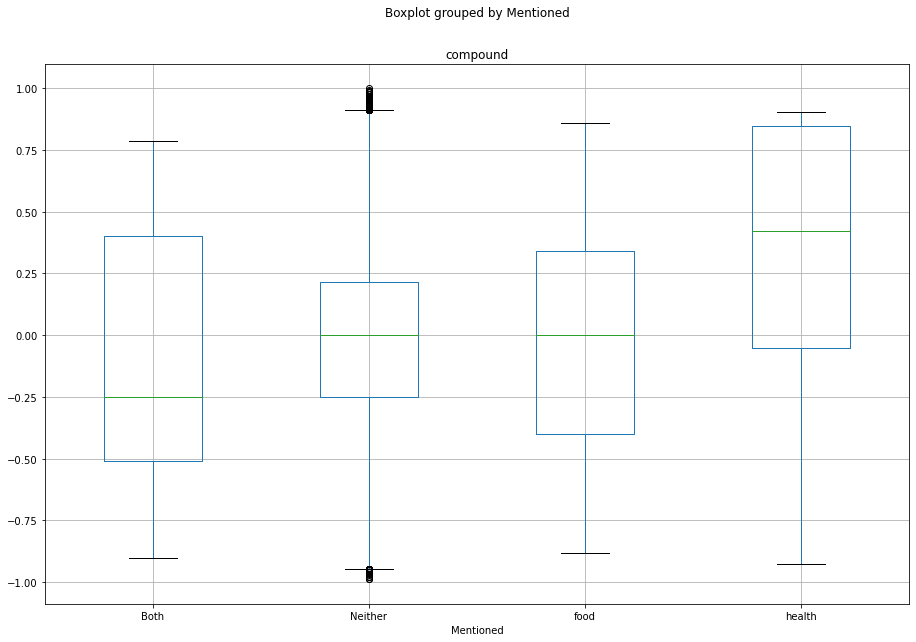

In [15]:
# Let's create a simple box plot showing the sentiment by impact mentioned

df.boxplot('compound', by='Mentioned', figsize=(15, 10))

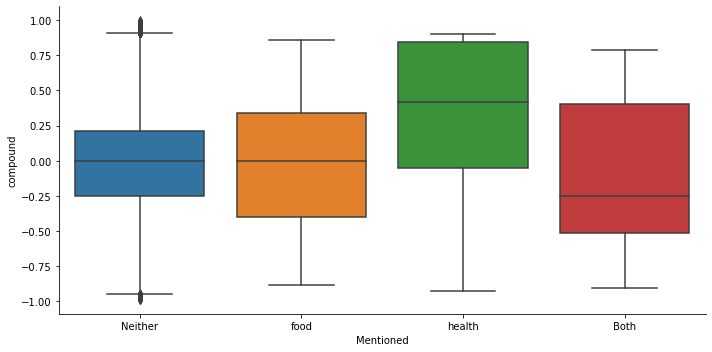

In [16]:
sns.catplot(data=df, x='Mentioned', y='compound', kind='box', height=5, aspect=10/5)

## Location Analysis

In [17]:
# number of null in user location
df['user_location'].isna().sum()

28504

In [18]:
# percent of null in user location

df['user_location'].isna().sum()/len(df)

0.36426837060702877

In [19]:
# look at top 20 locations
df['user_location'].value_counts().head(20)

Lagos, Nigeria              1291
Nigeria                      718
Australia                    711
United States                392
Thailand                     375
ประเทศไทย                    367
Kampala, Uganda              362
London, England              310
Canada                       307
London                       304
Melbourne, Victoria          294
USA                          271
United Kingdom               259
Abuja, Nigeria               249
Earth                        249
Bangkok, Thailand            238
Planet Earth                 230
กรุงเทพมหานคร, ประเทศไทย     209
UK                           205
Sydney, New South Wales      205
Name: user_location, dtype: int64

In [20]:
# create a column showing the location in USA

usa = []
state_list = ["alaska", "alabama", "arkansas", "american samoa", "arizona", "california", "colorado", "connecticut", "district of columbia", "delaware", "florida", "georgia", "guam", "hawaii", "iowa", "idaho", "illinois", "indiana", "kansas", "kentucky", "louisiana", "massachusetts", "maryland", "maine", "michigan", "minnesota", "missouri", "mississippi", "montana", "north carolina", "north dakota", "nebraska", "new hampshire", "new jersey", "new mexico", "nevada", "new york", "ohio", "oklahoma", "oregon", "pennsylvania", "puerto rico", "rhode island", "south carolina", "south dakota", "tennessee", "texas", "utah", "virginia", "virgin islands", "vermont", "washington", "wisconsin", "west virginia", "wyoming"]
country_list = ['usa', 'united states']


for index, row in df.iterrows():
    location = str(row['user_location']).lower()
    location = location.replace(",", "")

    if any(map(location.__contains__, country_list)):
        usa.append(True)
    elif any(map(location.__contains__, state_list)):
        usa.append(True)
    else:    
        usa.append(False)
        
df['USA'] = usa

In [21]:
df.loc[:, ['user_location', 'USA']].head()

,user_location,USA
0,Earth,False
1,Everywhere,False
2,NaN,False
3,"Sydney, New South Wales",False
4,BAPS Worldwide,False


In [22]:
# only look at the USA accout

df[df.USA]['user_location'].groupby(df['user_location']).value_counts().nlargest(20)


user_location        user_location      
United States        United States          392
USA                  USA                    271
Washington, DC       Washington, DC         186
California, USA      California, USA        122
New York, NY         New York, NY           104
Florida, USA         Florida, USA            89
New York, USA        New York, USA           72
New York             New York                66
New Jersey, USA      New Jersey, USA         65
Virginia, USA        Virginia, USA           60
Texas, USA           Texas, USA              59
Ohio, USA            Ohio, USA               46
New York City        New York City           42
Texas                Texas                   42
Washington, D.C.     Washington, D.C.        41
California           California              37
Georgia, USA         Georgia, USA            37
North Carolina, USA  North Carolina, USA     35
Pennsylvania, USA    Pennsylvania, USA       33
Oregon, USA          Oregon, USA             28

In [23]:
# sentiment by user location

df[df.USA==1].groupby('user_location')['compound'].agg(['count','mean','std', 'min', 'max']).nlargest(20, 'count')


,count,mean,std,min,max
user_location,,,,,
United States,392,-0.057285,0.430118,-0.8957,0.9118
USA,271,-0.020586,0.383473,-0.8658,0.9062
"Washington, DC",186,-0.028002,0.424603,-0.7946,0.7572
"California, USA",122,-0.087764,0.390266,-0.9075,0.8689
"New York, NY",104,-0.024314,0.437163,-0.7783,0.8807
"Florida, USA",89,-0.052291,0.392004,-0.7783,0.9118
"New York, USA",72,-0.059111,0.405316,-0.8074,0.8588
New York,66,0.021735,0.457665,-0.7845,0.8442
"New Jersey, USA",65,-0.080792,0.406661,-0.8934,0.7351


In [24]:
# calssify user loation by state

TX=[]
GA=[]
IL=[]
MA=[]
PA=[]
CA=[]
WA=[]
ME=[]
NH=[]
VT=[]
NY=[]
CT=[]
RI=[]
NJ=[]
DE=[]
MD=[]
DC=[]
VA=[]
WV=[]
NC=[]
SC=[]
FL=[]
AL=[]
TN=[]
KY=[]
OH=[]
MI=[]
USA=[]
IN=[]
WI=[]
MS=[]
LA=[]
AR=[]
MO=[]
IA=[]
MT=[]
MN=[]
ND=[]
SD=[]
NE=[]
KS=[]
OK=[]
NM=[]
CO=[]
WY=[]
ID=[]
UT=[]
AZ=[]
NV=[]
OR=[]
HI=[]
AK=[]
UK=[]

Location=[]

for index, row in df.iterrows():
    tweet = str(row['user_location'])

    if "Dallas" in tweet or "Houston" in tweet or "TX" in tweet or "Tx" in tweet or "tx" in tweet or "Austin" in tweet or "Texas" in tweet:
        TX.append(1)
    else:
        TX.append(0)
    if "Atlanta" in tweet or "GA" in tweet or "Georgia" in tweet or "Ga" in tweet or "ga" in tweet or "georgia" in tweet:
        GA.append(1)
    else:
        GA.append(0)
    if "Chicago" in tweet or "IL" in tweet or "Illinois" in tweet or "il" in tweet or "illinois" in tweet:
        IL.append(1)
    else:
        IL.append(0)
    if "Massachusetts" in tweet or "MA" in tweet or "ma" in tweet or "massachusetts" in tweet or "Boston" in tweet or "Worcester" in tweet or "Springfield" in tweet or "MA" in tweet:
        MA.append(1)
    else:
        MA.append (0)
    if "PA" in tweet or "Pennsylvania" in tweet or "Philidalphia" in tweet or "Philly" in tweet or "Pittsburgh" in tweet:
        PA.append(1)
    else:
        PA.append(0)
    if "CA" in tweet or "California" in tweet or "Los Angeles" in tweet or "Cali" in tweet or "San Bernardino" in tweet or "Orange" in tweet:
        CA.append(1)
    else:
        CA.append(0)
    if "WA" in tweet or "Seattle" in tweet or "Spokane" in tweet or "Washington" in tweet:
        WA.append(1)
    else:
        WA.append(0)
    if "ME" in tweet or "Maine" in tweet:
        ME.append(1)
    else:
        ME.append(0)
    if "NH" in tweet or "New Hampshire" in tweet or "Concord" in tweet:
        NH.append(1)
    else:
        NH.append(0)
    if "VT" in tweet or "Vermont" in tweet:
        VT.append(1)
    else:
        VT.append(0)
    if "NY" in tweet or "New York" in tweet or "Albany" in tweet or "Manhattan" in tweet or "Long Island" in tweet:
        NY.append(1)
    else:
        NY.append(0)
    if "CT" in tweet or "Connecticut" in tweet or "Hartford" in tweet or "Stanford" in tweet or "New London" in tweet or "New Haven" in tweet:
        CT.append(1)
    else:
        CT.append(0)
    if "RI" in tweet or "Rhode Island" in tweet or "Providence" in tweet or "Fall River" in tweet or "Pawtucket" in tweet:
        RI.append(1)
    else:
        RI.append(0)
    if "NJ" in tweet or "New Jersey" in tweet or "Jersey" in tweet or "Jersey Shore" in tweet:
        NJ.append(1)
    else:
        NJ.append(0)
    if "DE" in tweet or "Delaware" in tweet:
        DE.append(1)
    else:
        DE.append(0)
    if "MD" in tweet or "Ocean City" in tweet or "Baltimore" in tweet or "Maryland" in tweet:
        MD.append(1)
    else:
        MD.append(0)
    if "DC" in tweet or "District of Columbia" in tweet:
        DC.append(1)
    else:
        DC.append(0)
    if "VA" in tweet or "Virginia" in tweet or "Richmond" in tweet:
        VA.append(1)
    else:
        VA.append(0)
    if "WV" in tweet or "West Virginia" in tweet or "Charleston" in tweet:
        WV.append(1)
    else:
        WV.append(0)
    if "NC" in tweet or "North Carolina" in tweet or "Outter Banks" in tweet or "Raleigh" in tweet:
        NC.append(1)
    else:
        NC.append(0)
    if "SC" in tweet or "South Carolina" in tweet or "Columbia" in tweet:
        SC.append(1)
    else:
        SC.append(0)
    if "FL" in tweet or "Florida" in tweet or "Orlando" in tweet or "Sarasota" in tweet or "Daytona" in tweet or "Gainsville" in tweet or "Clearwater" in tweet or "Saint Petersburg" in tweet or "Tallahassee" in tweet:
        FL.append(1)
    else:
        FL.append(0)
    if "AL" in tweet or "Alabama" in tweet or "Birmingham" in tweet or "Bessemer" in tweet or "Montgomery" in tweet or "Mobile" in tweet:
        AL.append(1)
    else:
        AL.append(0)
    if "TN" in tweet or "Tennessee" in tweet or "Knoxville" in tweet or "Chattanooga" in tweet:
        TN.append(1)
    else:
        TN.append(0)
    if "KY" in tweet or "Kentucky" in tweet or "Lexington" in tweet or "Louisville" in tweet:
        KY.append(1)
    else:
        KY.append(0)
    if "OH" in tweet or "Ohio" in tweet or "Cincinnati" in tweet:
        OH.append(1)
    else:
        OH.append(0)
    if "MI" in tweet or "Michigan" in tweet or "Detroit" in tweet or "Novi" in tweet:
        MI.append(1)
    else:
        MI.append(0)
    if "USA" in tweet or "US" in tweet or "United States" in tweet or "America" in tweet or "United States of America" in tweet:
        USA.append(1)
    else:
        USA.append(0)
    if "IN" in tweet or "Indiana" in tweet or "Indy" in tweet or "Indianapolis" in tweet:
        IN.append(1)
    else:
        IN.append(0)
    if "WI" in tweet or "Wisconsin" in tweet:
        WI.append(1)
    else:
        WI.append(0)
    if "MS" in tweet or "Mississippi" in tweet or "Jackson" in tweet:
        MS.append(1)
    else:
        MS.append(0)
    if "LA" in tweet or "Louisiana" in tweet or "The Big Easy" in tweet or "New Orleans" in tweet:
        LA.append(1)
    else:
        LA.append(0)
    if "AR" in tweet or "Arkansas" in tweet or "Little Rock" in tweet:
        AR.append(1)
    else:
        AR.append(0)
    if "MO" in tweet or "Missouri" in tweet or "Saint Louis" in tweet or "Kansas City" in tweet:
        MO.append(1)
    else:
        MO.append(0)
    if "IA" in tweet or "Iowa" in tweet or "Des Moines" in tweet:
        IA.append(1)
    else:
        IA.append(0)
    if "MT" in tweet or "Montana" in tweet or "Helena" in tweet:
        MT.append(1)
    else:
        MT.append(0)
    if "MN" in tweet or "Minnesota" in tweet or "Saint Paul" in tweet:
        MN.append(1)
    else:
        MN.append(0)
    if "ND" in tweet or "North Dakota" in tweet or "Bismark" in tweet:
        ND.append(1)
    else:
        ND.append(0)
    if "SD" in tweet or "South Dakota" in tweet or "Pierre" in tweet:
        SD.append(1)
    else:
        SD.append(0)
    if "NE" in tweet or "Nebraska" in tweet or "Lincoln" in tweet:
        NE.append(1)
    else:
        NE.append(0)
    if "KS" in tweet or "Kansas" in tweet or "Topeka" in tweet:
        KS.append(1)
    else:
        KS.append(0)
    if "OK" in tweet or "Oklahoma" in tweet or "Oklahoma City" in tweet:
        OK.append(1)
    else:
        OK.append(0)
    if "NM" in tweet or "New Mexico" in tweet or "Albuquerque" in tweet:
        NM.append(1)
    else:
        NM.append(0)
    if "CO" in tweet or "Colorado" in tweet or "Denver" in tweet or "Colorado Springs" in tweet:
        CO.append(1)
    else:
        CO.append(0)
    if "WY" in tweet or "Wyoming" in tweet or "Cheyenne" in tweet:
        WY.append(1)
    else:
        WY.append(0)
    if "ID" in tweet or "Idaho" in tweet or "Boise" in tweet:
        ID.append(1)
    else:
        ID.append(0)
    if "UT" in tweet or "Utah" in tweet or "Salk Lake City" in tweet:
        UT.append(1)
    else:
        UT.append(0)
    if "AZ" in tweet or "Arizona" in tweet or "Phoenix" in tweet or "Pheonix" in tweet or "Scottsdale" in tweet:
        AZ.append(1)
    else:
        AZ.append(0)
    if "NV" in tweet or "Nevada" in tweet or "Las Vegas" in tweet or "Vegas" in tweet:
        NV.append(1)
    else:
        NV.append(0)
    if "OR" in tweet or "Oregon" in tweet or "Portland" in tweet:
        OR.append(1)
    else:
        OR.append(0)
    if "HI" in tweet or "Hawaii" in tweet or "Kapolei" in tweet or "Honolulu" in tweet:
        HI.append(1)
    else: 
        HI.append(0)
    if "AK" in tweet or "Alaska" in tweet or "Juneau" in tweet or "Anchorage" in tweet:
        AK.append(1)
    else:
        AK.append(0)
    if "UK" in tweet or "United Kingdon" in tweet or "England" in tweet:
        UK.append(1)
    else:
        UK.append(0)
        
    if "Dallas" in tweet or "Houston" in tweet or "TX" in tweet or "Tx" in tweet or "tx" in tweet or "Austin" in tweet or "Texas" in tweet:
        Location.append('TX')
    elif "Atlanta" in tweet or "GA" in tweet or "Georgia" in tweet or "Ga" in tweet or "ga" in tweet or "georgia" in tweet:
        Location.append('GA')
    elif "Chicago" in tweet or "IL" in tweet or "Illinois" in tweet or "il" in tweet or "illinois" in tweet:
        Location.append('IL')
    elif  "Massachusetts" in tweet or "MA" in tweet or "ma" in tweet or "massachusetts" in tweet or "Boston" in tweet or "Worcester" in tweet or "Springfield" in tweet or "MA" in tweet:
        Location.append('MA')
    elif "PA" in tweet or "Pennsylvania" in tweet or "Philidalphia" in tweet or "Philly" in tweet or "Pittsburgh" in tweet:
        Location.append ('PA')
    elif "CA" in tweet or "California" in tweet or "Los Angeles" in tweet or "Cali" in tweet or "San Bernardino" in tweet or "Orange" in tweet:
        Location.append('CA')
    elif "WA" in tweet or "Seattle" in tweet or "Spokane" in tweet or "Washington" in tweet:
        Location.append('WA')
    elif "ME" in tweet or "Maine" in tweet:
        Location.append('ME')
    elif "NH" in tweet or "New Hampshire" in tweet or "Concord" in tweet:
        Location.append('NH')
    elif "VT" in tweet or "Vermont" in tweet:
        Location.append('VT')  
    elif "NY" in tweet or "New York" in tweet or "Albany" in tweet or "Manhattan" in tweet or "Long Island" in tweet:
        Location.append('NY')
    elif "CT" in tweet or "Connecticut" in tweet or "Hartford" in tweet or "Stanford" in tweet or "New London" in tweet or "New Haven" in tweet:
        Location.append('CT')
    elif "RI" in tweet or "Rhode Island" in tweet or "Providence" in tweet or "Fall River" in tweet or "Pawtucket" in tweet:
        Location.append('RI')
    elif "NJ" in tweet or "New Jersey" in tweet or "Jersey" in tweet or "Jersey Shore" in tweet:
        Location.append('NJ')
    elif "DE" in tweet or "Delaware" in tweet:
        Location.append('DE')
    elif "MD" in tweet or "Ocean City" in tweet or "Baltimore" in tweet or "Maryland" in tweet:
        Location.append('MD')
    elif "DC" in tweet or "District of Columbia" in tweet:
        Location.append('DC')
    elif "VA" in tweet or "Virginia" in tweet or "Richmond" in tweet:
        Location.append('VA')
    elif "WV" in tweet or "West Virginia" in tweet or "Charleston" in tweet:
        Location.append('WV')
    elif "NC" in tweet or "North Carolina" in tweet or "Outter Banks" in tweet or "Raleigh" in tweet:
        Location.append('NC')
    elif "SC" in tweet or "South Carolina" in tweet or "Columbia" in tweet:
        Location.append('SC')
    elif "FL" in tweet or "Florida" in tweet or "Orlando" in tweet or "Sarasota" in tweet or "Daytona" in tweet or "Gainsville" in tweet or "Clearwater" in tweet or "Saint Petersburg" in tweet or "Tallahassee" in tweet:
        Location.append('FL')
    elif "AL" in tweet or "Alabama" in tweet or "Birmingham" in tweet or "Bessemer" in tweet or "Montgomery" in tweet or "Mobile" in tweet:
        Location.append('AL')
    elif "TN" in tweet or "Tennessee" in tweet or "Knoxville" in tweet or "Chattanooga" in tweet:
        Location.append('TN')
    elif "KY" in tweet or "Kentucky" in tweet or "Lexington" in tweet or "Louisville" in tweet:
        Location.append('KY')
    elif "OH" in tweet or "Ohio" in tweet or "Cincinnati" in tweet:
        Location.append('OH')
    elif "MI" in tweet or "Michigan" in tweet or "Detroit" in tweet or "Novi" in tweet:
        Location.append("MI")
    elif "IN" in tweet or "Indiana" in tweet or "Indy" in tweet or "Indianapolis" in tweet:
        Location.append('IN')
    elif "WI" in tweet or "Wisconsin" in tweet:
        Location.append('WI')
    elif "MS" in tweet or "Mississippi" in tweet or "Jackson" in tweet:
        Location.append('MS')
    elif "LA" in tweet or "Louisiana" in tweet or "The Big Easy" in tweet or "New Orleans" in tweet:
        Location.append('LA')
    elif "AR" in tweet or "Arkansas" in tweet or "Little Rock" in tweet:
        Location.append('AR')
    elif "MO" in tweet or "Missouri" in tweet or "Saint Louis" in tweet or "Kansas City" in tweet:
        Location.append('MO')
    elif "IA" in tweet or "Iowa" in tweet or "Des Moines" in tweet:
        Location.append('IA')
    elif "MT" in tweet or "Montana" in tweet or "Helena" in tweet:
        Location.append('MT')
    elif "MN" in tweet or "Minnesota" in tweet or "Saint Paul" in tweet:
        Location.append('MN')
    elif "ND" in tweet or "North Dakota" in tweet or "Bismark" in tweet:
        Location.append('ND')
    elif "SD" in tweet or "South Dakota" in tweet or "Pierre" in tweet:
        Location.append('SD')
    elif "NE" in tweet or "Nebraska" in tweet or "Lincoln" in tweet:
        Location.append('NE')
    elif "KS" in tweet or "Kansas" in tweet or "Topeka" in tweet:
        Location.append('KS')
    elif "OK" in tweet or "Oklahoma" in tweet or "Oklahoma City" in tweet:
        Location.append('OK')
    elif "NM" in tweet or "New Mexico" in tweet or "Albuquerque" in tweet:
        Location.append('NM')
    elif "CO" in tweet or "Colorado" in tweet or "Denver" in tweet or "Colorado Springs" in tweet:
        Location.append('CO')
    elif "WY" in tweet or "Wyoming" in tweet or "Cheyenne" in tweet:
        Location.append('WY')
    elif "ID" in tweet or "Idaho" in tweet or "Boise" in tweet:
        Location.append('ID')
    elif "UT" in tweet or "Utah" in tweet or "Salk Lake City" in tweet:
        Location.append('UT')
    elif "AZ" in tweet or "Arizona" in tweet or "Phoenix" in tweet or "Pheonix" in tweet or "Scottsdale" in tweet:
        Location.append('AZ')
    elif "NV" in tweet or "Nevada" in tweet or "Las Vegas" in tweet or "Vegas" in tweet:\
        Location.append('NV')
    elif "OR" in tweet or "Oregon" in tweet or "Portland" in tweet:
        Location.append('OR')
    elif "HI" in tweet or "Hawaii" in tweet or "Kapolei" in tweet or "Honolulu" in tweet:
        Location.append('HI')
    elif "AK" in tweet or "Alaska" in tweet or "Juneau" in tweet or "Anchorage" in tweet:
        Location.append('AK')
    elif "UK" in tweet or "United Kingdon" in tweet or "England" in tweet:
        Location.append('UK')

    elif "USA" in tweet or "US" in tweet or "United States" in tweet or "America" in tweet or "United States of America" in tweet:
        Location.append('USA')
    else:
        Location.append('Z_Unknown')

df['AZ']=AZ
df['UT']=UT
df['TX']=TX
df['OK']=OK
df['NE']=NE
df['GA']=GA
df['IL']=IL
df['MA']=MA
df['PA']=PA
df['CA']=CA
df['WA']=WA
df['ME']=ME
df['NH']=NH
df['VT']=VT
df['NY']=NY
df['CT']=CT
df['RI']=RI
df['NJ']=NJ
df['DE']=DE
df['MD']=MD
df['DC']=DC
df['VA']=VA
df['WV']=WV
df['NC']=NC
df['SC']=SC
df['FL']=FL
df['AL']=AL
df['TN']=TN
df['KY']=KY
df['OH']=OH
df['MI']=MI
df['USA']=USA
df['IN']=IN
df['WI']=WI
df['MS']=MS
df['LA']=LA
df['AR']=AR
df['MO']=MO
df['IA']=IA
df['MT']=MT
df['MN']=MN
df['ND']=ND
df['SD']=SD
df['KS']=KS
df['NM']=NM
df['CO']=CO
df['WY']=WY
df['ID']=ID
df['NV']=NV
df['OR']=OR
df['HI']=HI
df['AK']=AK
df['UK']=UK
df['Location']= Location

In [25]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [26]:
df['Location'].value_counts().head(20)

Z_Unknown    62842
IL            2596
GA            1943
UK            1923
MA            1496
CA             976
USA            912
NY             684
WA             579
TX             449
FL             357
VA             281
SC             203
CO             195
OR             183
CT             177
PA             168
IN             160
NJ             157
OH             149
Name: Location, dtype: int64

In [27]:
# sentiment by user location -a better approach

df[df.USA==1].groupby('Location')['compound'].agg(['count','mean','std', 'min', 'max']).nlargest(20, 'count')

,count,mean,std,min,max
Location,,,,,
USA,912,-0.047319,0.417212,-0.9883,0.9118
CA,170,-0.041295,0.394080,-0.9075,0.9022
FL,114,-0.047875,0.431062,-0.9153,0.9118
MA,91,-0.097626,0.402135,-0.8126,0.9118
NY,91,-0.039288,0.391989,-0.8074,0.8588
GA,82,0.019774,0.405199,-0.8934,0.8763
NJ,82,-0.074065,0.420517,-0.8934,0.7351
TX,76,-0.071351,0.468788,-0.9488,0.9877
VA,69,-0.081101,0.481462,-0.8625,0.9430


## Gender Guesser

In this section we will guess a persons gender based off of their first name. We split the name using the first space found into a first and last name.

In [28]:
# You only need to run this once then comment out the code.
!pip install gender_guesser

In [29]:
# This splits the name field into two different fields and saves it in a new dataframe
names = df["name"].str.split(" ", n = 1, expand = True)
names.head(10)

,0,1
0,Crazy,Monkey
1,Daniella,Pierre ✊🏿
2,Cricket,None
3,John,Skinner
4,BAPS,Youth
5,Hrishikesh,Thaker
6,ミ☆,None
7,BAPS,Youth
8,ree⁷,None
9,Crazy,Monkey


In [30]:
df['first_name']=names[0] # create a column showing the first name

In [31]:
df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [32]:
import gender_guesser.detector as gender

d = gender.Detector()

In [33]:
# Let's rerun it and save the guessed gender back to the dataframe
genderguess = []

for index, row in df.iterrows():
    genderguess.append(d.get_gender(row['first_name']))
    
df['gender'] = genderguess

df.head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
0,1508290031596843010,Mon Mar 28 03:49:00 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,Alteredbeastx7,Crazy Monkey,Earth,46,290,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Crazy,unknown
1,1508290042338422789,Mon Mar 28 03:49:03 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Daniella4Change,Daniella Pierre ✊🏿,Everywhere,1066,1221,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Daniella,female
2,1508290053998481409,Mon Mar 28 03:49:06 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,Shabulouschic,Cricket,NaN,557,759,Mon Mar 28 03:00:57 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Cricket,unknown
3,1508290078891642888,Mon Mar 28 03:49:12 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,johncskinner1,John Skinner,"Sydney, New South Wales",1139,2667,Mon Mar 28 03:42:54 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,John,male
4,1508290088832167938,Mon Mar 28 03:49:14 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,BAPS_Youth,BAPS Youth,BAPS Worldwide,3160,13,Sun Mar 27 04:19:35 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,BAPS,unknown


In [34]:
df['gender'].value_counts()

unknown          55741
male             12145
female            7542
mostly_female     1412
mostly_male        896
andy               514
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='compound'>

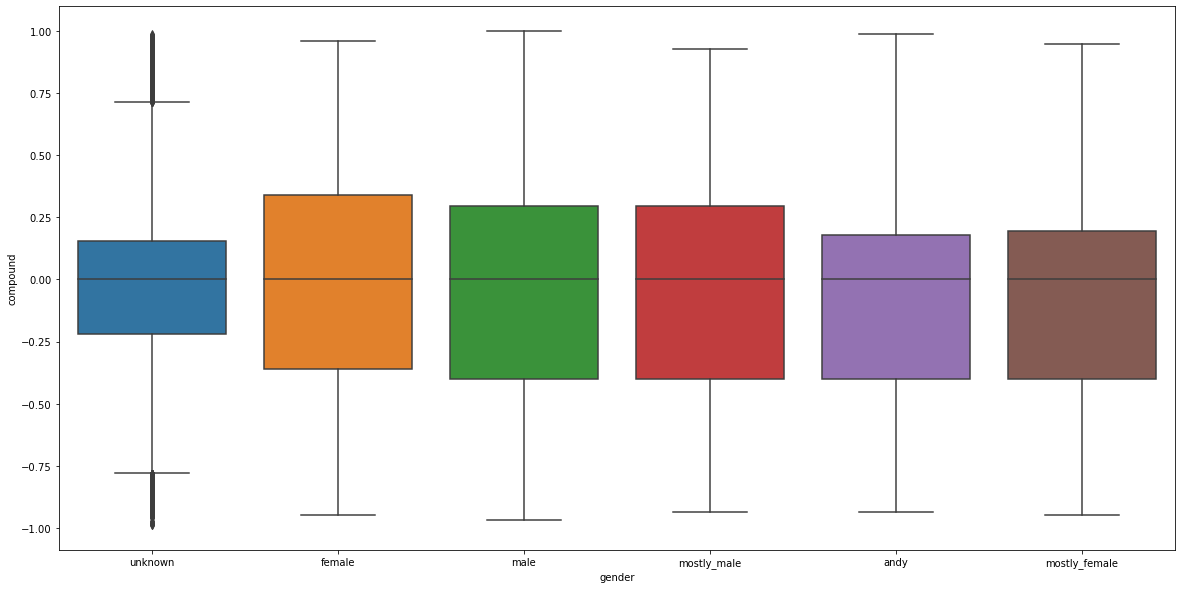

In [35]:
# let see whether sentiment differs by gender

sns.boxplot(data=df, x='gender', y='compound')

In [36]:
# save the result (including sentiment and gender) back into a csv file for further analysis

df.to_csv('climate_change03.csv', sep='|', index=False)

## In class

## 1. For gender column, combine male and mostly male into on category, female and mostly female into another category, create a boxplot show whether sentiment differ by gender.

In [37]:
import pandas as pd

df=pd.read_csv('climate_change03.csv', sep='|')


In [38]:
df.query("gender=='mostly_male'").head()

,tweet_id,created_at,source,lang,user_name,name,user_location,user_followers_count,user_friends_count,retweet_created_at,...,WY,ID,NV,OR,HI,AK,UK,Location,first_name,gender
25,1508290997171666945,Mon Mar 28 03:52:51 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,RichKurtzman,Rich Kurtzman,Fort Collins,8094,1678,NaN,...,0,0,0,0,0,0,0,Z_Unknown,Rich,mostly_male
41,1508291513599799297,Mon Mar 28 03:54:54 +0000 2022,"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",en,ChrisLancashir3,Chris Lancashire,NaN,3085,4996,Sun Mar 27 15:24:33 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Chris,mostly_male
43,1508291527575064577,Mon Mar 28 03:54:57 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,cknasaboy,Chris White,MCC-H,1281,798,Fri Mar 25 23:07:23 +0000 2022,...,0,0,0,0,0,0,0,Z_Unknown,Chris,mostly_male
46,1508291541193924619,Mon Mar 28 03:55:00 +0000 2022,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",en,SamGozinsky,Sam Gozinsky,"New York, NY",471,689,Mon Mar 28 03:05:30 +0000 2022,...,0,0,0,0,0,0,0,NY,Sam,mostly_male
57,1508291623301623808,Mon Mar 28 03:55:20 +0000 2022,"<a href=""https://mobile.twitter.com"" rel=""nofollow"">Twitter Web App</a>",en,_Spunky_Monkey,"Les Saxton, FJT (not a goal) 🤡🌎",Badger enroute to Florida,86,273,Sun Mar 27 22:29:14 +0000 2022,...,0,0,0,0,0,0,0,FL,Les,mostly_male


In [39]:
df['gender1']=df['gender'].str.replace("mostly_male", 'male')
df['gender1']=df['gender1'].str.replace("mostly_female", 'female')

df['gender1'].value_counts()

unknown    55741
male       13041
female      8954
andy         514
Name: gender1, dtype: int64

<AxesSubplot:xlabel='gender1', ylabel='compound'>

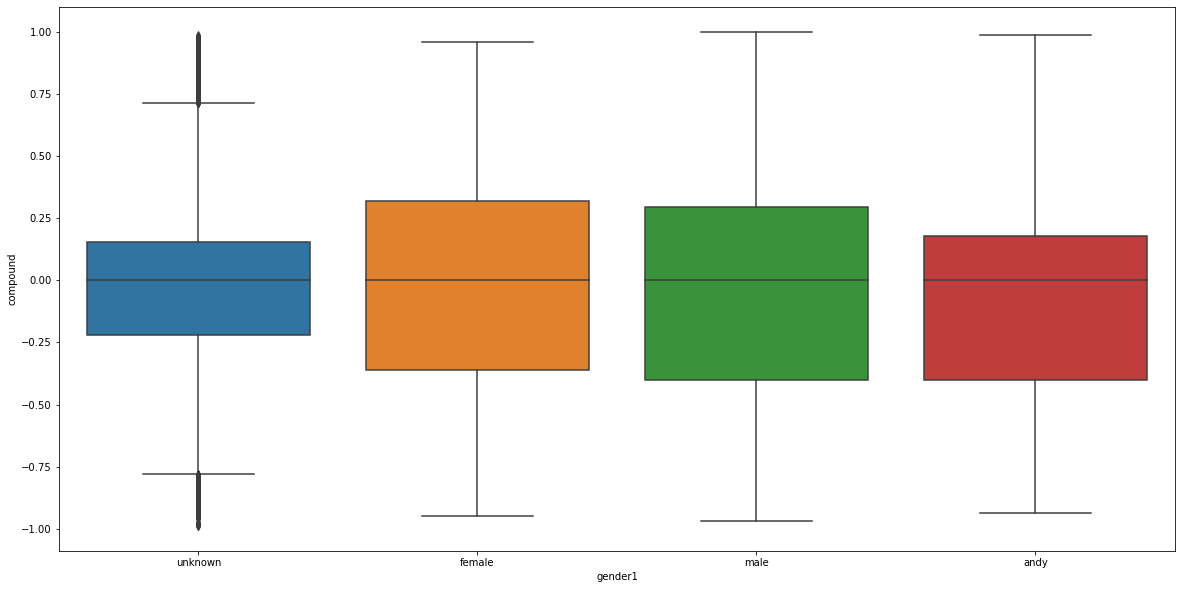

In [40]:
import seaborn as sns

sns.boxplot(data=df, x='gender1', y='compound')

## 2. display number of tweets, and sentiment of tweets by location and by gender for top 5 locations in the US. Top location is determined by number of tweets

In [41]:
# identify top 5 locations, remove unknown location

top5Locations=df.query("Location!='Z_Unknown'")['Location'].value_counts().reset_index().iloc[:, 0].head(5)

top5Locations

0    IL
1    GA
2    UK
3    MA
4    CA
Name: index, dtype: object

In [42]:
df1=df[df['Location'].isin(top5Locations)].groupby(['Location', 'gender1'])['compound'].agg(['count','mean','std', 'min', 'max'])
df1

count      mean       std     min     max
Location gender1                                           
CA       andy         9  0.409133  0.376412  0.0000  0.9265
         female     177  0.039898  0.419283 -0.8957  0.9589
         male       283 -0.032013  0.438861 -0.9485  0.9265
         unknown    507  0.017051  0.430169 -0.9795  0.9274
GA       andy         6 -0.244900  0.607558 -0.7783  0.8442
         female     339  0.045834  0.420947 -0.8957  0.9382
         male       473 -0.093643  0.474880 -0.8957  0.9118
         unknown   1125  0.005307  0.427438 -0.9169  0.9501
IL       andy        13 -0.001262  0.298345 -0.3944  0.4939
         female     256 -0.005732  0.425160 -0.9136  0.9274
         male       433 -0.047038  0.432883 -0.9364  0.9138
         unknown   1894  0.003143  0.319203 -0.8977  0.9022
MA       andy        11 -0.112100  0.479806 -0.7096  0.7184
         female     192  0.030136  0.439587 -0.8402  0.9274
         male       328 -0.044420  0.438119 -0.8957  0.9274
         unknown    965  0.009948  0.422583 -0.9501  0.9485
UK       andy        13 -0.100185  0.514435 -0.7717  0.8957
         female     376 -0.032583  0.473463 -0.9050  0.9381
         male       513 -0.052793  0.447012 -0.9130  0.8847
         unknown   1021 -0.036934  0.434973 -0.9364  0.9759

In [43]:
df2=df1.reset_index()
df2.head()

,Location,gender1,count,mean,std,min,max
0,CA,andy,9,0.409133,0.376412,0.0000,0.9265
1,CA,female,177,0.039898,0.419283,-0.8957,0.9589
2,CA,male,283,-0.032013,0.438861,-0.9485,0.9265
3,CA,unknown,507,0.017051,0.430169,-0.9795,0.9274
4,GA,andy,6,-0.244900,0.607558,-0.7783,0.8442


In [44]:
# rename the columns

column_names=["Location", "Gender", "Number of Tweets", "Sentiment", "STD", "Highest Sentiment", "Lowest Sentiment"]
df2.columns=column_names
df2.head()

,Location,Gender,Number of Tweets,Sentiment,STD,Highest Sentiment,Lowest Sentiment
0,CA,andy,9,0.409133,0.376412,0.0000,0.9265
1,CA,female,177,0.039898,0.419283,-0.8957,0.9589
2,CA,male,283,-0.032013,0.438861,-0.9485,0.9265
3,CA,unknown,507,0.017051,0.430169,-0.9795,0.9274
4,GA,andy,6,-0.244900,0.607558,-0.7783,0.8442


<AxesSubplot:xlabel='Location', ylabel='Number of Tweets'>

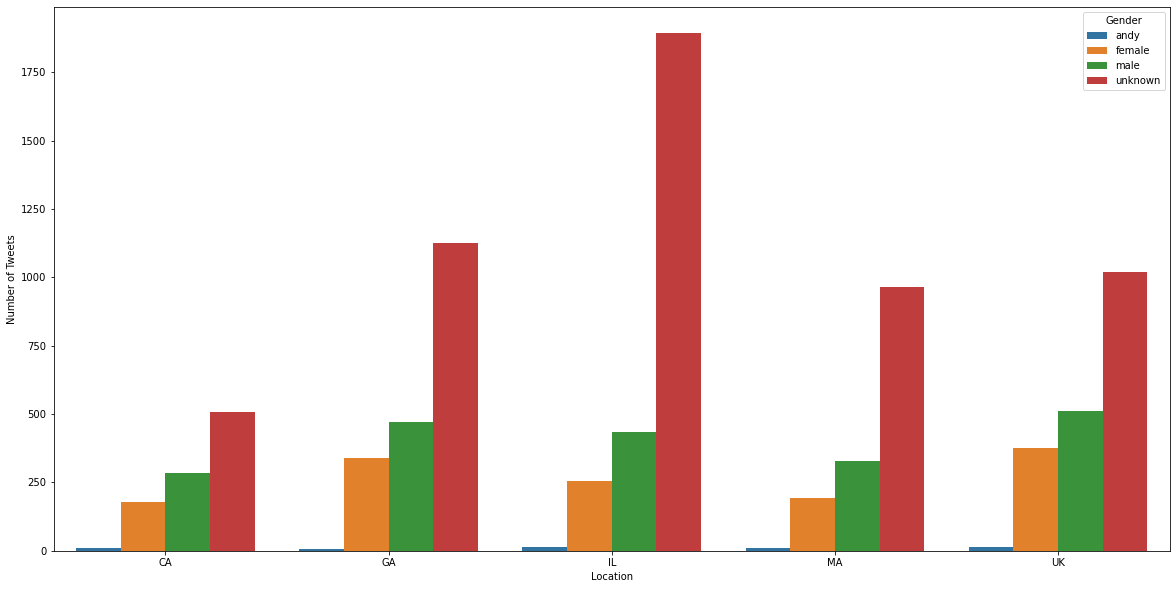

In [45]:
sns.barplot(x='Location', y='Number of Tweets', hue ='Gender', data=df2)

<AxesSubplot:xlabel='Location', ylabel='Sentiment'>

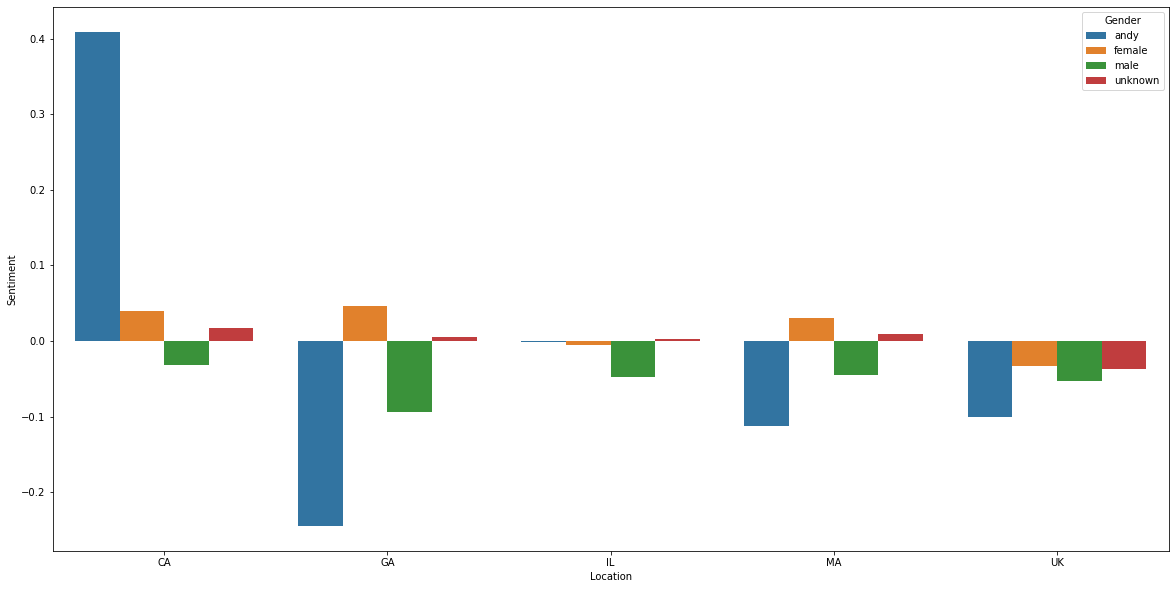

In [46]:
sns.barplot(x='Location', y='Sentiment', hue ='Gender', data=df2)